# Neural Networks Visualization

Imports and setup

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add scripts folder to path
sys.path.append(os.path.abspath("../scripts"))

from activations import tanh, tanh_derivative, softmax
from layers import DenseLayer
from loss import cross_entropy_loss, cross_entropy_derivative
from network import SimpleNeuralNet

Try it with the iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data           # shape: (150, 4) — 4 features
y = iris.target.reshape(-1, 1)  # shape: (150, 1)

# One-hot encode the labels (3 classes)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
  X_scaled, y_encoded, test_size=0.2, random_state=42
)

Initialize and train network

In [3]:
net = SimpleNeuralNet()
net.add(DenseLayer(4, 8, tanh, tanh_derivative, use_adam=True))
net.add(DenseLayer(8, 3, softmax, lambda x: 1, use_adam=True))

losses = []

epochs = 50
batch_size = 10
learning_rate = 0.01

for epoch in range(epochs):
    indices = np.random.permutation(len(x_train))
    x_train = x_train[indices]
    y_train = y_train[indices]

    epoch_loss = 0
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        output = net.forward(x_batch)
        loss = cross_entropy_loss(output, y_batch)
        grad = cross_entropy_derivative(output, y_batch)
        net.backward(grad, learning_rate)
        epoch_loss += loss

    avg_loss = epoch_loss / (len(x_train) / batch_size)
    losses.append(avg_loss)

print("Training complete.")

Training complete.


Plot training loss

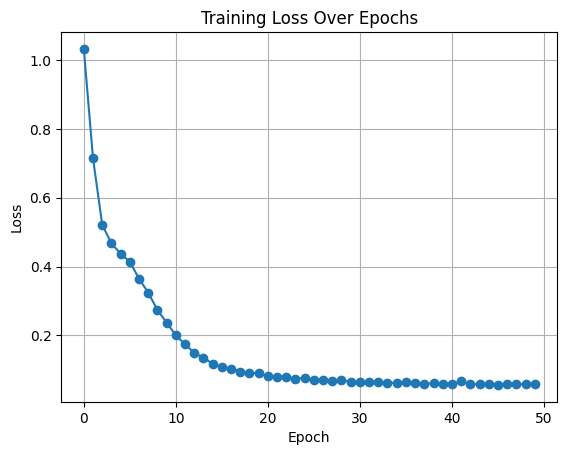

In [4]:
plt.plot(losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Check accuracy

In [5]:
preds = net.forward(x_train)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_train, axis=1)

accuracy = np.mean(predicted_classes == true_classes)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 97.50%


Show a few predictions

In [6]:
for i in range(5):
    print(f"Sample {i + 1}")
    print("Input:", x_train[i])
    print("Predicted:", preds[i])
    print("True Label:", y_train[i])
    print("-" * 30)

Sample 1
Input: [-0.53717756  1.93979142 -1.39706395 -1.05217993]
Predicted: [9.98282965e-01 1.71687955e-03 1.55218918e-07]
True Label: [1. 0. 0.]
------------------------------
Sample 2
Input: [-1.02184904 -2.43394714 -0.14664056 -0.26238682]
Predicted: [2.66109479e-04 9.98916623e-01 8.17267124e-04]
True Label: [0. 1. 0.]
------------------------------
Sample 3
Input: [0.55333328 0.55861082 1.27429511 1.71209594]
Predicted: [5.34865865e-07 8.37667218e-04 9.99161798e-01]
True Label: [0. 0. 1.]
------------------------------
Sample 4
Input: [-1.26418478  0.78880759 -1.05603939 -1.3154443 ]
Predicted: [9.98083357e-01 1.91646883e-03 1.74090509e-07]
True Label: [1. 0. 0.]
------------------------------
Sample 5
Input: [-0.29484182 -0.13197948  0.42173371  0.3957741 ]
Predicted: [0.00104965 0.976645   0.02230535]
True Label: [0. 1. 0.]
------------------------------


Visualize weights of first layer

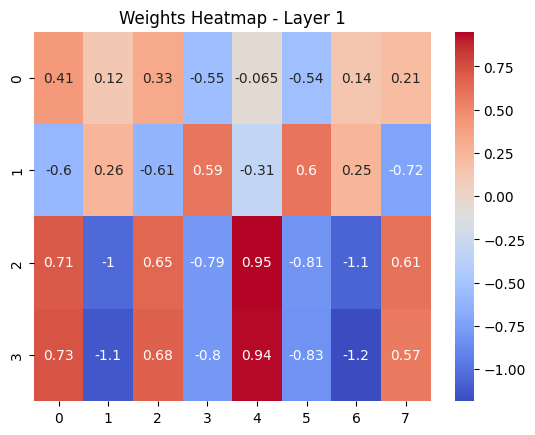

In [7]:
weights = net.layers[0].weights

sns.heatmap(weights, annot=True, cmap="coolwarm")
plt.title("Weights Heatmap - Layer 1")
plt.show()